In [1]:
import tensorflow.keras,os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout,BatchNormalization,Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [2]:
### NOTE : In train_generator batch_size = number of images in your train folder 
### In val_generator, batch_size = number of images in your val folder

#Directories for the training, validation, and test splits
train_dir = 'cats_and_dogs_small/train'
validation_dir = 'cats_and_dogs_small/validation'
test_dir = 'cats_and_dogs_small/test'

# load the dataset 
from tensorflow.keras. preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
zoom_range=0.2,
horizontal_flip=True)


train_generator  = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=10,
    class_mode='categorical'
)



val_datagen = ImageDataGenerator(rescale=1./255)
validation_generator  = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=10,
    class_mode='categorical'
) 


test_datagen = ImageDataGenerator(rescale=1./255)
test_generator  = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=10,
    class_mode='categorical'
) 

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [3]:
# make a prediction for a new image.
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
 
model = load_model('cats_and_dogs_small_2.h5')

In [4]:
# Re-evaluate the model
loss, acc = model.evaluate(test_generator,verbose=2)
print("Restored model2, accuracy: {:5.2f}%".format(100 * acc))

100/100 - 24s - loss: 1.1551 - acc: 0.5000
Restored model2, accuracy: 50.00%


In [5]:
y_pred = model.predict(test_generator) 

In [6]:
y_pred

array([[0.21940202],
       [0.06490925],
       [0.03574061],
       [0.49810225],
       [0.43453932],
       [0.11671254],
       [0.34829926],
       [0.9409616 ],
       [0.3444785 ],
       [0.48096898],
       [0.48395717],
       [0.06597221],
       [0.2235305 ],
       [0.99930155],
       [0.18537876],
       [0.97908014],
       [0.962407  ],
       [0.04163861],
       [0.64853895],
       [0.08967486],
       [0.09451631],
       [0.99954075],
       [0.08101729],
       [0.6505685 ],
       [0.7429275 ],
       [0.62851226],
       [0.30696696],
       [0.38225642],
       [0.812173  ],
       [0.05004239],
       [0.49569336],
       [0.99889207],
       [0.16952673],
       [0.15375304],
       [0.72742295],
       [0.9056814 ],
       [0.17330605],
       [0.6974386 ],
       [0.48878214],
       [0.10963142],
       [0.60299057],
       [0.1152094 ],
       [0.12115508],
       [0.09507069],
       [0.7203147 ],
       [0.10525507],
       [0.595693  ],
       [0.106

In [7]:
y_classes = np.zeros(y_pred.shape)
for i,scores in enumerate(y_pred):
    if scores>0.5:
        y_classes[i] = 1
    else:
        y_classes[i] = 0   
            
        
# Note: for multi classification (if you used softmax activation at output layer)
# y_classes = np.argmax(y_pred, axis=1)

In [8]:
y_classes

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],

In [18]:
from sklearn.metrics import confusion_matrix,classification_report

print('Confusion Matrix')
cf_matrix = confusion_matrix(test_generator.classes, y_classes)
print(cf_matrix)


print('Classification Report')
target_names = ['Cats', 'Dogs']
print(classification_report(validation_generator.classes, y_classes, target_names=target_names))


Confusion Matrix
[[315 185]
 [312 188]]
Classification Report
              precision    recall  f1-score   support

        Cats       0.50      0.63      0.56       500
        Dogs       0.50      0.38      0.43       500

    accuracy                           0.50      1000
   macro avg       0.50      0.50      0.49      1000
weighted avg       0.50      0.50      0.49      1000



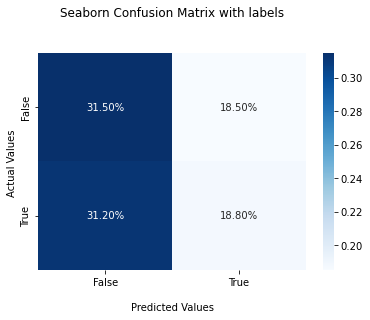

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea 

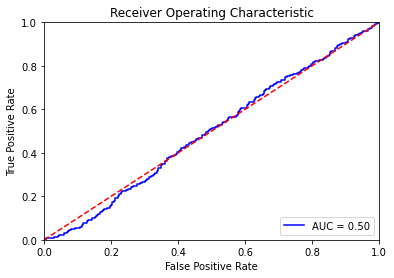

In [29]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(test_generator.classes, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()